In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.layers import LSTM

In [15]:
classifier = Sequential()

In [16]:
classifier.add(Conv2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

In [17]:
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [18]:
classifier.add(Conv2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [19]:
classifier.add(Flatten())

In [20]:
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

In [21]:
classifier.compile(
              optimizer = optimizers.SGD(learning_rate = 0.1),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
training_set = train_datagen.flow_from_directory(
        'C:\\Users\\eqbal\\OneDrive\\Desktop\\MinorProject\\poudel\\Simple-Sign-Language-Detector-master\\mydata\\training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.


In [25]:
test_set = test_datagen.flow_from_directory(
        'C:\\Users\\eqbal\\OneDrive\\Desktop\\MinorProject\\poudel\\Simple-Sign-Language-Detector-master\\mydata\\test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 6500 images belonging to 26 classes.


In [26]:
model = classifier.fit(
        training_set,
        steps_per_epoch=int(45500/32),
        epochs=25,
        validation_data=test_set,
        validation_steps=int(6500/32),
)

Epoch 1/25
1421/1421 [==============================] - 667s 469ms/step - loss: 2.1195 - accuracy: 0.3323 - val_loss: 1.0526 - val_accuracy: 0.6553
Epoch 2/25
1421/1421 [==============================] - 605s 426ms/step - loss: 1.3391 - accuracy: 0.5503 - val_loss: 0.7885 - val_accuracy: 0.7366
Epoch 3/25
1421/1421 [==============================] - 284s 200ms/step - loss: 1.1557 - accuracy: 0.6059 - val_loss: 0.7188 - val_accuracy: 0.7591
Epoch 4/25
1421/1421 [==============================] - 92s 65ms/step - loss: 1.0597 - accuracy: 0.6377 - val_loss: 0.6996 - val_accuracy: 0.7582
Epoch 5/25
1421/1421 [==============================] - 92s 65ms/step - loss: 0.9986 - accuracy: 0.6578 - val_loss: 0.6581 - val_accuracy: 0.7942
Epoch 6/25
1421/1421 [==============================] - 91s 64ms/step - loss: 0.9575 - accuracy: 0.6692 - val_loss: 0.5864 - val_accuracy: 0.8180
Epoch 7/25
1421/1421 [==============================] - 91s 64ms/step - loss: 0.9114 - accuracy: 0.6896 - val_loss: 0.

In [15]:
#Saving the model
import h5py
classifier.save('fahad_model1.h5')

C:\Users\eqbal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
print(model.history.keys())
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


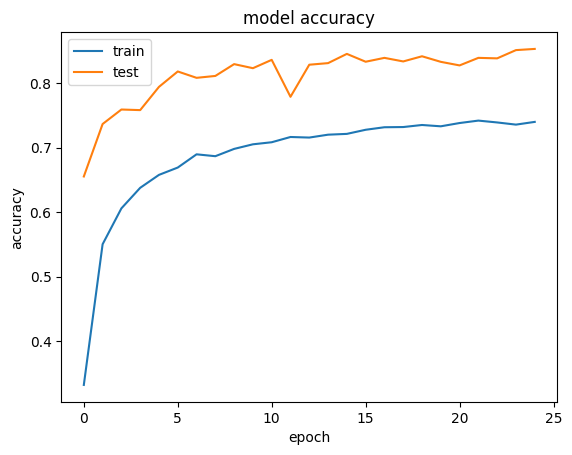

In [28]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

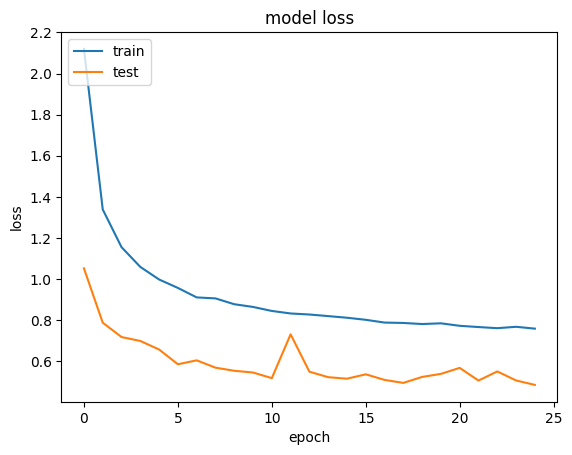

In [29]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
model.history

{'loss': [1.1877223253250122,
  1.1804848909378052,
  1.2185635566711426,
  1.1911381483078003,
  1.2208640575408936,
  1.2114448547363281,
  1.158426284790039,
  1.1812670230865479,
  1.194933533668518,
  1.1923593282699585],
 'accuracy': [0.6006944179534912,
  0.5960648059844971,
  0.5753477811813354,
  0.5979938507080078,
  0.5814043283462524,
  0.59375,
  0.6037808656692505,
  0.595678985118866,
  0.5879629850387573,
  0.5922067761421204],
 'val_loss': [0.8524688482284546,
  0.8312650322914124,
  0.8513986468315125,
  0.888990044593811,
  0.8369901180267334,
  0.8263195157051086,
  0.8032686710357666,
  0.809203565120697,
  0.8581427931785583,
  0.8592984080314636],
 'val_accuracy': [0.7643164992332458,
  0.7566194534301758,
  0.7473829984664917,
  0.7378386855125427,
  0.7560036778450012,
  0.7520012259483337,
  0.7544642686843872,
  0.7567734122276306,
  0.7361453175544739,
  0.7464593648910522]}